In [1]:
print("h")

h


# Feature engineering
step1: importing lib

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

df=pd.read_csv('EasyVisa.csv.zip')

In [4]:
print(df.shape)

(25480, 12)


In [5]:
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


step 2: data cleaning

1: handling missing data

2: checeking duplicate

3: check dataa type

4: understand the data

In [ ]:
#1: handling missing data
feature_with_null=[i for i in df.columns if df[i].isnull().sum()>0]
feature_with_null

[]

No null value seen in data set

In [13]:
#2: checeking duplicate
col_with_duplicate=[i for i in df.columns if df.duplicated().sum()>0]
col_with_duplicate

[]

No duplicate in the dataset

In [14]:
#2.1 dropping case_id as it is unique for each record and not useful for analysis


df.drop('case_id',inplace=True,axis=1)

### Feature engineering


In [15]:
df.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [16]:
# here yr_of_estab it has year value so we can convert it by subtracting from current year.
import datetime
current_year=datetime.datetime.now().year
print(current_year)

2025


In [17]:
df['company_age']=current_year-df['yr_of_estab']
df.head(3)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17


In [18]:
df.drop('yr_of_estab',inplace=True,axis=1)

In [19]:
df.head(1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18


In [23]:
# types of feature:
# numerical features

numerical_features=[i for i in df.columns if df[i].dtype!='object']
print(len(numerical_features),numerical_features)

3 ['no_of_employees', 'prevailing_wage', 'company_age']


In [24]:
#categorical features
categorical_features=[i for i in df.columns if df[i].dtype=='object']
print(len(categorical_features),categorical_features)

8 ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [27]:
#listing column value for numerical feature upto 10 values
for col in numerical_features:
    print(f"{col}:{df[col][:10]}")

no_of_employees:0    14513
1     2412
2    44444
3       98
4     1082
5     2339
6     4985
7     3035
8     4810
9     2251
Name: no_of_employees, dtype: int64
prevailing_wage:0       592.2029
1     83425.6500
2    122996.8600
3     83434.0300
4    149907.3900
5     78252.1400
6     53635.3900
7       418.2298
8     74362.1900
9     67514.7600
Name: prevailing_wage, dtype: float64
company_age:0     18
1     23
2     17
3    128
4     20
5     13
6     31
7    101
8     13
9     30
Name: company_age, dtype: int64


In [29]:
from collections import Counter
for i in numerical_features:
    print(f"{i}:{Counter(df[i])},end=" "\n")
    

no_of_employees:Counter({183: 18, 854: 16, 724: 16, 766: 15, 1476: 15, 546: 14, 169: 14, 986: 14, 1666: 14, 795: 14, 2504: 13, 2384: 13, 869: 13, 922: 13, 1458: 13, 633: 13, 878: 13, 964: 13, 214: 13, 166: 13, 501: 13, 1368: 13, 1751: 13, 1829: 13, 1341: 13, 2601: 13, 358: 13, 341: 13, 1652: 12, 746: 12, 1359: 12, 1566: 12, 448: 12, 412: 12, 496: 12, 1002: 12, 304: 12, 1393: 12, 1561: 12, 802: 12, 1217: 12, 1454: 12, 962: 12, 1777: 12, 786: 12, 619: 12, 414: 12, 1599: 12, 884: 12, 1139: 12, 622: 12, 1085: 12, 764: 12, 1040: 12, 376: 12, 368: 12, 405: 12, 1801: 12, 439: 12, 1687: 12, 1441: 12, 163: 12, 1096: 12, 882: 12, 32: 12, 506: 12, 1892: 12, 1647: 11, 2423: 11, 488: 11, 306: 11, 1375: 11, 2090: 11, 781: 11, 3115: 11, 2650: 11, 673: 11, 645: 11, 1318: 11, 1817: 11, 603: 11, 203: 11, 616: 11, 1913: 11, 63: 11, 707: 11, 1470: 11, 538: 11, 739: 11, 516: 11, 918: 11, 1221: 11, 1060: 11, 491: 11, 451: 11, 736: 11, 1305: 11, 558: 11, 2998: 11, 317: 11, 1011: 11, 885: 11, 1822: 11, 1986: 

In [ ]:
# Discrete features
discrete_features=[i for i in numerical_features if len(df[i].unique())<=25]
print(len(discrete_features),discrete_features)

0 []


In [26]:
#continous features
continous_features=[i for i in numerical_features if len(df[i].unique()>25)]
print(len(continous_features),continous_features)

3 ['no_of_employees', 'prevailing_wage', 'company_age']


In [45]:
# step 4: splitting
x=df.drop('case_status',axis=1)
y=df['case_status']

In [46]:
x.head(1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18


In [48]:
y.head(5)

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [73]:
#converting y into arry form by encoding labels

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


In [74]:
y


array([1, 0, 1, ..., 0, 0, 0])

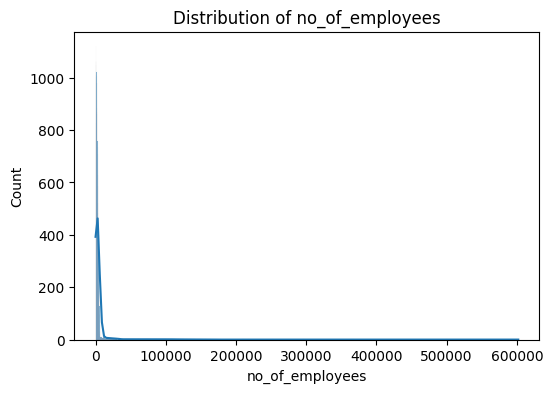

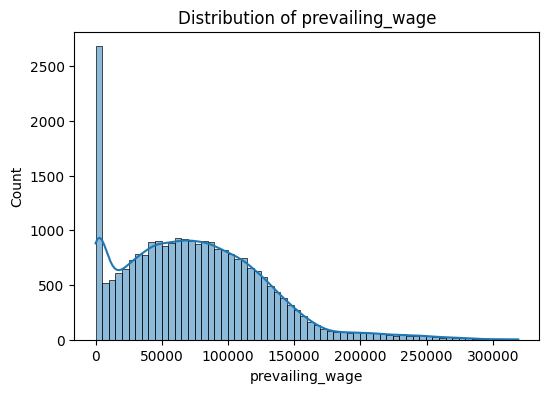

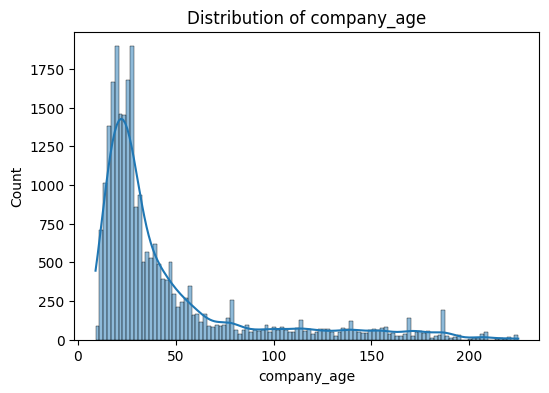

In [79]:
#now plotting graph for continous features
for col in continous_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [81]:
# handling this skewness by power transformation to reduce the outliers
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
trasform_feature=['no_of_employees','company_age'] #since skewness is present in these two features in high %
X_copy=pt.fit_transform(x[trasform_feature])

In [86]:
X_copy=pd.DataFrame(X_copy,columns=trasform_feature)
X_copy

,no_of_employees,company_age
0,1.517300,-0.955551
1,0.030912,-0.467001
2,2.885076,-1.078363
3,-1.343550,1.630914
4,-0.432287,-0.738126
...,...,...
25475,0.079917,-1.078363
25476,0.235747,-0.842544
25477,-0.413885,1.550209
25478,-0.111949,1.684739


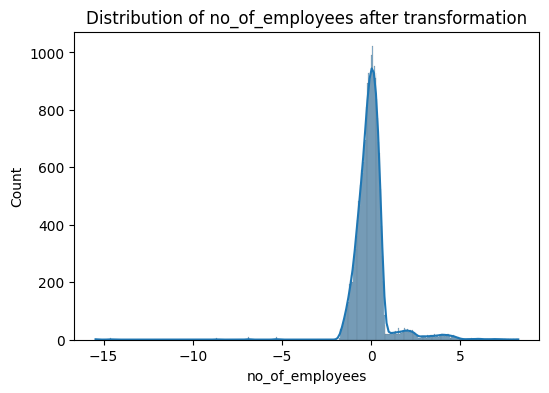

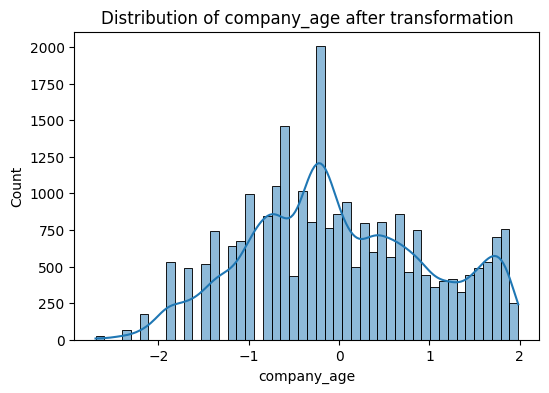

In [90]:
#plotting graphs after transformation
for col in trasform_feature:
    plt.figure(figsize=(6,4))
    sns.histplot(X_copy[col],kde=True)
    plt.title(f'Distribution of {col} after transformation')
    plt.show()

In [91]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status',
       'company_age'],
      dtype='object')

handled skewness

In [92]:
# now for categorical feature we will perform one hot and ordinal encoding based on the number of unique values in the feature.
#ordinal encoding --> best when there is some order/rank in the categorical feature
#one hot encoding --> best when there is random categories with no order

#creating column trasnformer with 3 typers of transformer
or_columns= ['has_job_experience','requires_job_training','full_time_position','education_of_employee'] #this has yes/no in column
oh_columns=['continent','unit_of_wage','region_of_employment'] #these has random categories
transform_columns=['no_of_employees','company_age'] #these are continous features which we have transformed

from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer=StandardScaler() #used to standardize feature in one scale
oh_transformer=OneHotEncoder()
ordinal_encoder=OrdinalEncoder()

#creating pipeline
transform_pipe=Pipeline(steps=[
    ('transformer',PowerTransformer(method='yeo-johnson'))
])

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,oh_columns),
        ('OrdinalEncoder',ordinal_encoder,or_columns),
        ('Transformer',transform_pipe,transform_columns),
        ('StandardScaler',numeric_transformer,continous_features)
    ]
)

In [93]:
X=preprocessor.fit_transform(x)


In [94]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

In [ ]:
#now balancing the data using SMOTE technique
from imblearn.combine import SMOTETomek,SMOTEENN

#resampling the minority class
smt=SMOTEENN(random_state=42,sampling_strategy='minority') #SMOT+ENN Method make sure every new run doest change the data

#fit the model and resample
X_res,y_res=smt.fit_resample(X,y) #X is features and y is target variable

## step 7: Train test split


In [96]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42) #42 bcoz its believed we get best result on this
X_train.shape,X_test.shape

((13629, 24), (3408, 24))

In [97]:
y_train.shape,y_test.shape

((13629,), (3408,))

In [107]:
# step 8: checking this on different classifier model how it performs and selecting best model

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

def evalute_clf(true,predicted):
    acc=accuracy_score(true,predicted)
    prec=precision_score(true,predicted)
    rec=recall_score(true,predicted)
    f1=f1_score(true,predicted)
    roc_auc=roc_auc_score(true,predicted)
    return acc,prec,rec,f1,roc_auc


In [108]:
models={
    'Logistic Regression':LogisticRegression(),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'XGBoost':XGBClassifier(eval_metric='logloss'),
    'CatBoost':CatBoostClassifier(verbose=0)
}

In [115]:
#creating a fucnction which can evaluate all model at once and return the best model with report.

def evaluate_models(X,y,models):

    #training and testing split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    model_list=[]
    acc_list=[]
    auc_list=[]

    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        #making prediction on y_test and y_train using x_test and x_train
        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)

        #training set perfomance
        model_train_acc,model_train_f1,model_train_precision,model_train_recall,model_train_rocauc_score,\
        =evalute_clf(y_train,y_train_pred)

        #testing set performance
        model_test_acc,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score,\
        =evalute_clf(y_test,y_test_pred)

        print(list(models.keys())[i])
        print('----------------------------------')
        model_list.append(list(models.keys())[i])

        print('model performance on train set:')     
        print(f'Accuracy:{model_train_acc*100:.2f}%')
        print(f'Precision:{model_train_precision*100:.2f}%')
        print(f'Recall:{model_train_recall*100:.2f}%')
        print(f'F1-score:{model_train_f1*100:.2f}%')
        print(f'ROC-AUC:{model_train_rocauc_score*100:.2f}%')

        print('-----------------------------------')
        print('model performance on test set:')
        print(f'Accuracy:{model_train_acc*100:.2f}%')
        print(f'Precision:{model_train_precision*100:.2f}%')
        print(f'Recall:{model_train_recall*100:.2f}%') 
        print(f'F1-score:{model_train_f1*100:.2f}%')
        print(f'ROC-AUC:{model_train_rocauc_score*100:.2f}%')

        acc_list.append(model_test_acc)
        auc_list.append(model_test_rocauc_score)

    report=pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
    return report        

### step 9
Model training

In [116]:
base_model_report=evaluate_models(X=X_res,y=y_res,models=models)
base_model_report

Logistic Regression
----------------------------------
model performance on train set:
Accuracy:73.85%
Precision:73.88%
Recall:75.28%
F1-score:76.74%
ROC-AUC:73.85%
-----------------------------------
model performance on test set:
Accuracy:73.85%
Precision:73.88%
Recall:75.28%
F1-score:76.74%
ROC-AUC:73.85%
K-Nearest Neighbors
----------------------------------
model performance on train set:
Accuracy:96.55%
Precision:97.96%
Recall:96.84%
F1-score:95.74%
ROC-AUC:96.43%
-----------------------------------
model performance on test set:
Accuracy:96.55%
Precision:97.96%
Recall:96.84%
F1-score:95.74%
ROC-AUC:96.43%
Decision Tree
----------------------------------
model performance on train set:
Accuracy:100.00%
Precision:100.00%
Recall:100.00%
F1-score:100.00%
ROC-AUC:100.00%
-----------------------------------
model performance on test set:
Accuracy:100.00%
Precision:100.00%
Recall:100.00%
F1-score:100.00%
ROC-AUC:100.00%
Random Forest
----------------------------------
model performance

,Model,Accuracy,AUC
0,Logistic Regression,0.725939,0.725738
1,K-Nearest Neighbors,0.941608,0.940032
2,Decision Tree,0.927230,0.926245
3,Random Forest,0.950704,0.950105
4,Gradient Boosting,0.879108,0.878757
5,AdaBoost,0.845951,0.845270
6,XGBoost,0.931925,0.931677
7,CatBoost,0.928110,0.928522


In [117]:
# now we will shortlist K-Nearest Neighbors , Random Forest, XGBoost to chreck best 
#after hyperparameter tuning using RandomizedSearchCV or GridSearchCV.

In [120]:
#here can we use hyperparameter tuning to improve model performance
# define paraamater distrubution for each model

xgboost_params={
    'max_depth':range(3,10,2),  #LIKE START FROM 3 TILL 10 WITH STEP 2 this is depth of tree
    'min_child_weight':range(1,6,2)
}

random_forest_params={
    "max_depth":range(3,10,2),
    "max_features":['auto','sqrt','log2'],
    'n_estimators':[10,50,100,200]
}

knn_params={
    'algorithm':['auto','ball_tree','kd_tree'],
    'weights':['uniform','distance'],
    'n_neighbors':[3,5,7,9]
}

In [121]:
#using randomized search cv for hyperparameter tuning

randomcv_models=[
    ('XGBoost',XGBClassifier(),xgboost_params),
    ('Random Forest',RandomForestClassifier(),random_forest_params),
    ('K-Nearest Neighbors',KNeighborsClassifier(),knn_params)
]

In [122]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(model,params,cv=5,n_iter=10,scoring='accuracy',n_jobs=-1,verbose=2,random_state=42)
    random.fit(X_res,y_res)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"----- best parameters for {model_name} -----" )
    print(model_param[model_name])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....................max_depth=9, min_child_weight=3; total time=   3.2s
[CV] END ....................max_depth=9, min_child_weight=3; total time=   3.2s
[CV] END ....................max_depth=9, min_child_weight=1; total time=   3.2s
[CV] END ....................max_depth=9, min_child_weight=3; total time=   3.2s
[CV] END ....................max_depth=9, min_child_weight=3; total time=   3.3s
[CV] END ....................max_depth=9, min_child_weight=1; total time=   3.4s
[CV] END ....................max_depth=9, min_child_weight=3; total time=   3.4s
[CV] END ....................max_depth=9, min_child_weight=1; total time=   3.4s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   1.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   1.1s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   1.0s
[CV] END ....................max_depth=3, min_ch

In [124]:
#retraining the model with best parameters

from sklearn.metrics import roc_auc_score,roc_curve

best_models={
    "Random Forest":RandomForestClassifier(**model_param["Random Forest"]),
    "K-Nearest Neighbors":KNeighborsClassifier(**model_param["K-Nearest Neighbors"]),
    "XGBoost":XGBClassifier(**model_param["XGBoost"])
}
tuned_report=evaluate_models(X=X_res,y=y_res,models=best_models)
tuned_report


Random Forest
----------------------------------
model performance on train set:
Accuracy:90.51%
Precision:91.57%
Recall:91.23%
F1-score:90.88%
ROC-AUC:90.42%
-----------------------------------
model performance on test set:
Accuracy:90.51%
Precision:91.57%
Recall:91.23%
F1-score:90.88%
ROC-AUC:90.42%
K-Nearest Neighbors
----------------------------------
model performance on train set:
Accuracy:100.00%
Precision:100.00%
Recall:100.00%
F1-score:100.00%
ROC-AUC:100.00%
-----------------------------------
model performance on test set:
Accuracy:100.00%
Precision:100.00%
Recall:100.00%
F1-score:100.00%
ROC-AUC:100.00%
XGBoost
----------------------------------
model performance on train set:
Accuracy:99.92%
Precision:99.93%
Recall:99.93%
F1-score:99.92%
ROC-AUC:99.92%
-----------------------------------
model performance on test set:
Accuracy:99.92%
Precision:99.93%
Recall:99.93%
F1-score:99.92%
ROC-AUC:99.92%


,Model,Accuracy,AUC
0,Random Forest,0.881162,0.879528
1,K-Nearest Neighbors,0.968016,0.966515
2,XGBoost,0.944542,0.943786


final model becomes k-Nearest Neighbors